# Lab-2

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering, Birch, DBSCAN, AffinityPropagation, KMeans
from sklearn import cluster, datasets, mixture
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, adjusted_rand_score, normalized_mutual_info_score

## 1. Bayesian Classification + Support Vector Machine

### Auxiliary Procedures

In [2]:
def display_confusion_matrix(y_test, y_pred, title, labels):
    cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, cmap='Greens', yticklabels = labels, xticklabels = labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show();

In [3]:
def test_null_hypothesis(df):
    alpha = 0.05
    for column in df.columns:
        s, p = normaltest(df[column])
        if p > alpha:
            print('Null hypothesis can\'t be rejected for ' + column)
        else:
            print('Null hypothesis can be rejected for ' + column)

### Import data for the 1st and 2nd tasks

In [4]:
df1 = pd.read_csv("resources/teleCust1000t.csv")

### Null hypothesis testing

In [5]:
test_null_hypothesis(df1)

Null hypothesis can be rejected for region
Null hypothesis can be rejected for tenure
Null hypothesis can be rejected for age
Null hypothesis can be rejected for marital
Null hypothesis can be rejected for address
Null hypothesis can be rejected for income
Null hypothesis can be rejected for ed
Null hypothesis can be rejected for employ
Null hypothesis can be rejected for retire
Null hypothesis can be rejected for gender
Null hypothesis can be rejected for reside
Null hypothesis can be rejected for custcat


### Data preprocessing

In [6]:
df1_X = df1.drop(['custcat'], axis = 1)
df1_y = df1['custcat']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df1_X, df1_y, test_size = 0.2, random_state = 4)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Bayesian Classification

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.32      0.65      0.43        51
           2       0.25      0.07      0.11        44
           3       0.42      0.37      0.39        54
           4       0.47      0.33      0.39        51

    accuracy                           0.36       200
   macro avg       0.36      0.35      0.33       200
weighted avg       0.37      0.36      0.34       200



In [11]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.37      0.78      0.50       215
           2       0.31      0.08      0.12       173
           3       0.45      0.38      0.41       227
           4       0.39      0.23      0.29       185

    accuracy                           0.39       800
   macro avg       0.38      0.37      0.33       800
weighted avg       0.39      0.39      0.35       800



З подібності основних метрик оцінки класифікації для тренувальних та тестових даних робимо висновок про відсутність оверфітингу.

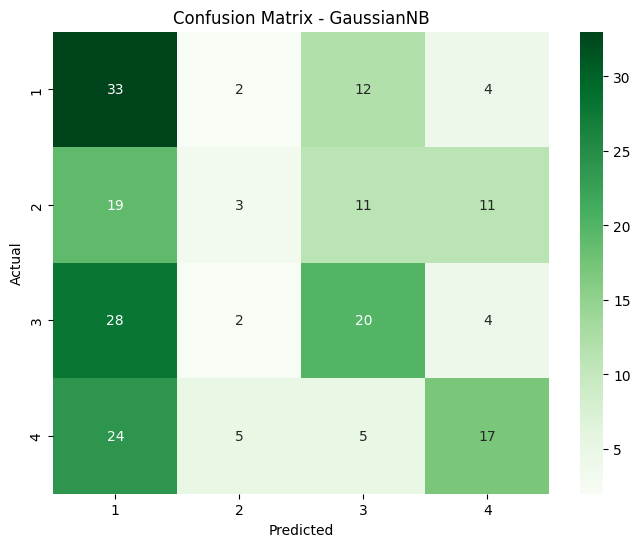

In [12]:
display_confusion_matrix(y_test, y_pred_test, 'Confusion Matrix - GaussianNB', ['1', '2', '3', '4'])

### Support Vector Machine

In [13]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.43      0.57      0.49        51
           2       0.45      0.23      0.30        44
           3       0.34      0.39      0.36        54
           4       0.37      0.35      0.36        51

    accuracy                           0.39       200
   macro avg       0.40      0.38      0.38       200
weighted avg       0.40      0.39      0.38       200



In [15]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.50      0.67      0.57       215
           2       0.56      0.32      0.40       173
           3       0.53      0.59      0.56       227
           4       0.54      0.47      0.50       185

    accuracy                           0.52       800
   macro avg       0.53      0.51      0.51       800
weighted avg       0.53      0.52      0.52       800



З неподібності основних метрик оцінки класифікації для тренувальних та тестових даних робимо висновок про можливу наявність оверфітингу.

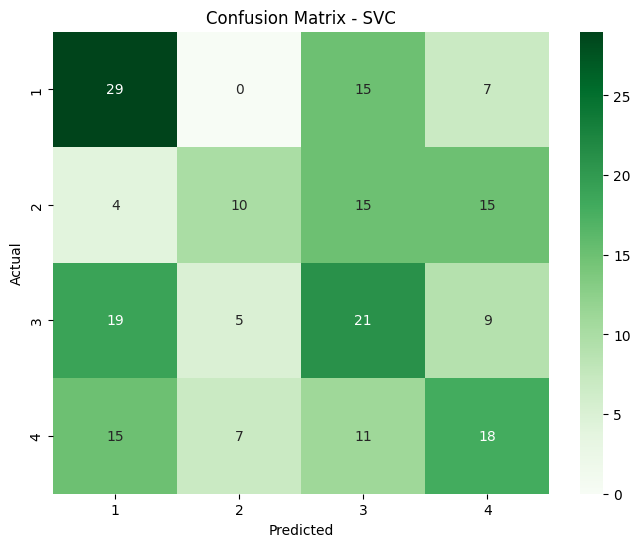

In [16]:
display_confusion_matrix(y_test, y_pred_test, 'Confusion Matrix - SVC', ['1', '2', '3', '4'])

### Comparison: Bayesian Classification VS C-Support Vector Classification

Модель на основі SVM алгоритму продемонструвала кращі результати за основними метриками оцінки класифікації (зокрема, за f1 та accuracy).

## 2. K Nearest Neighbors Classifier (Euclidean, Manhattan, Minkowski distance metrics)

### KNN (Euclidean distance metric)

In [17]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.33      0.47      0.39        51
           2       0.30      0.36      0.33        44
           3       0.29      0.26      0.27        54
           4       0.36      0.18      0.24        51

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.32      0.32      0.31       200



In [19]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.52      0.68      0.59       215
           2       0.51      0.51      0.51       173
           3       0.56      0.56      0.56       227
           4       0.55      0.37      0.44       185

    accuracy                           0.54       800
   macro avg       0.54      0.53      0.53       800
weighted avg       0.54      0.54      0.53       800



З неподібності основних метрик оцінки класифікації для тренувальних та тестових даних робимо висновок про можливу наявність оверфітингу.

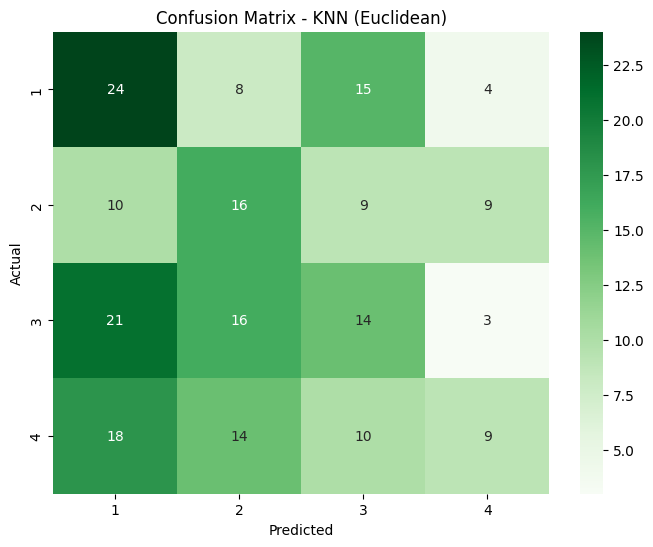

In [20]:
display_confusion_matrix(y_test, y_pred_test, 'Confusion Matrix - KNN (Euclidean)', ['1', '2', '3', '4'])

### KNN (Manhattan distance metric)

In [21]:
knn = KNeighborsClassifier(metric = 'manhattan')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.32      0.45      0.38        51
           2       0.29      0.32      0.30        44
           3       0.38      0.37      0.37        54
           4       0.30      0.16      0.21        51

    accuracy                           0.33       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.32      0.33      0.32       200



In [23]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.50      0.66      0.57       215
           2       0.47      0.51      0.49       173
           3       0.58      0.57      0.58       227
           4       0.56      0.32      0.41       185

    accuracy                           0.52       800
   macro avg       0.53      0.52      0.51       800
weighted avg       0.53      0.52      0.52       800



З неподібності основних метрик оцінки класифікації для тренувальних та тестових даних робимо висновок про можливу наявність оверфітингу.

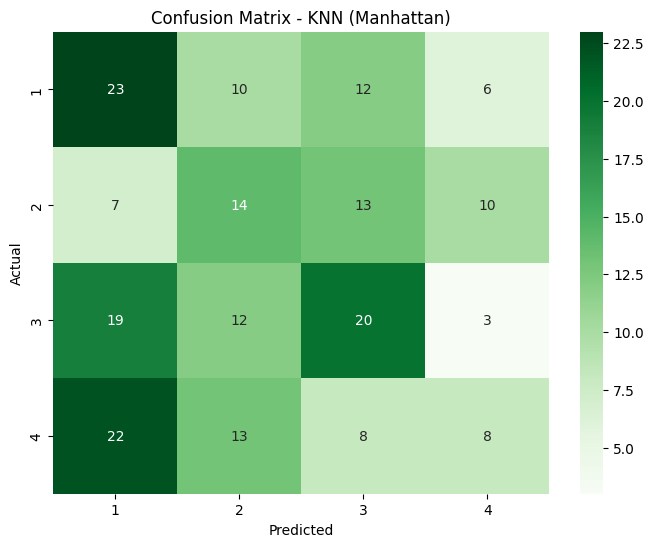

In [24]:
display_confusion_matrix(y_test, y_pred_test, 'Confusion Matrix - KNN (Manhattan)', ['1', '2', '3', '4'])

### KNN (Minkowski distance metric)

In [25]:
knn = KNeighborsClassifier(metric = 'minkowski')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.33      0.47      0.39        51
           2       0.30      0.36      0.33        44
           3       0.29      0.26      0.27        54
           4       0.36      0.18      0.24        51

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.32      0.32      0.31       200



In [27]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.52      0.68      0.59       215
           2       0.51      0.51      0.51       173
           3       0.56      0.56      0.56       227
           4       0.55      0.37      0.44       185

    accuracy                           0.54       800
   macro avg       0.54      0.53      0.53       800
weighted avg       0.54      0.54      0.53       800



З неподібності основних метрик оцінки класифікації для тренувальних та тестових даних робимо висновок про можливу наявність оверфітингу.

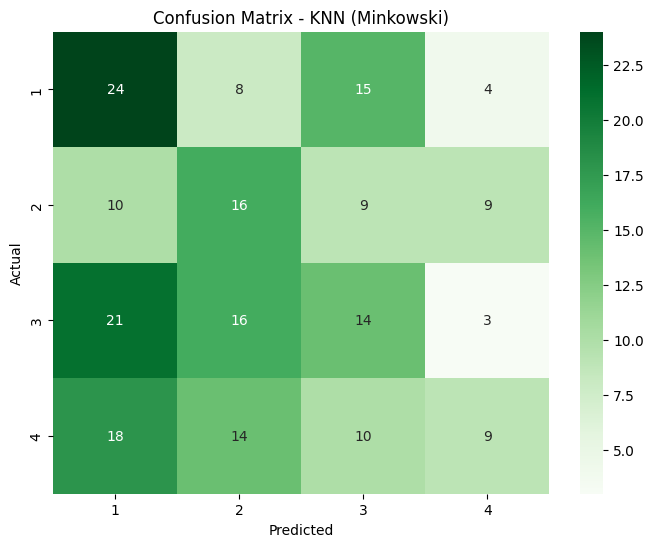

In [28]:
display_confusion_matrix(y_test, y_pred_test, 'Confusion Matrix - KNN (Minkowski)', ['1', '2', '3', '4'])

### Comparison: Euclidean VS Manhattan VS  Minkowski

KNN-моделі з використанням Euclidean і Minkowski метрик продемострували однакові результати. KNN-модель з використанням Manhattan метрики продемонструвала близький результат до попередніх двох. Відмінність мінімальна - визначити кращу модель не вдається.

## 3. Agnes, Birch, DBSCAN

### Auxiliary Procedures

In [29]:
def display_clusters(y_pred, X, title):
    plt.title(title)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    plt.show()

In [30]:
def display_clustering_evaluation_metrics(y_pred, y_actual):
    silhoutte_avg = silhouette_score(y_actual.reshape(-1, 1), y_pred)
    ari_score = adjusted_rand_score(y_actual, y_pred)
    nmi_score = normalized_mutual_info_score(y_actual, y_pred)
    print('Silhoutte score: ' + str(silhoutte_avg))
    print('ARI score: ' + str(ari_score))
    print('NMI score: ' + str(nmi_score))

### Data generation for the 3rd and 4th tasks

In [31]:
df2_X, df2_y = datasets.make_moons(n_samples = 2000, noise = .09, random_state = 10)

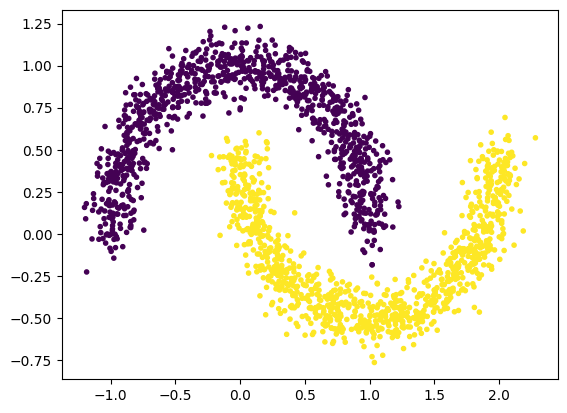

In [32]:
plt.scatter(df2_X[:, 0], df2_X[:, 1], marker = '.', c = df2_y)
plt.show()

### Agnes

In [33]:
agnes = AgglomerativeClustering(n_clusters = 2)
y_pred = agnes.fit_predict(df2_X)

In [34]:
display_clustering_evaluation_metrics(y_pred, df2_y)

Silhoutte score: 0.779019388791144
ARI score: 0.7155769186783432
NMI score: 0.6713586477684496


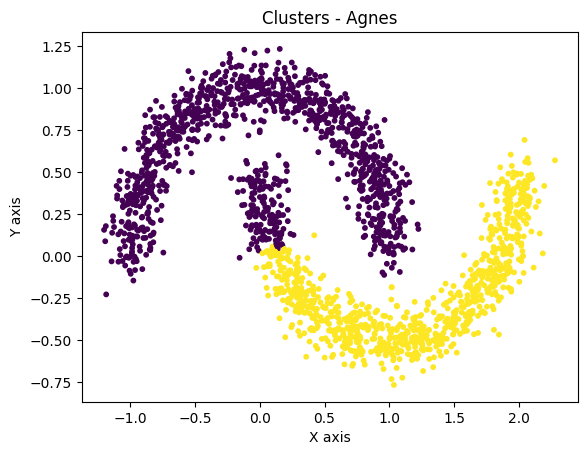

In [35]:
display_clusters(y_pred, df2_X, 'Clusters - Agnes')

### Birch

In [36]:
birch = Birch(n_clusters = 2)
y_pred = birch.fit_predict(df2_X)

In [37]:
display_clustering_evaluation_metrics(y_pred, df2_y)

Silhoutte score: 0.4715061542451542
ARI score: 0.3767076067566142
NMI score: 0.341366173543779


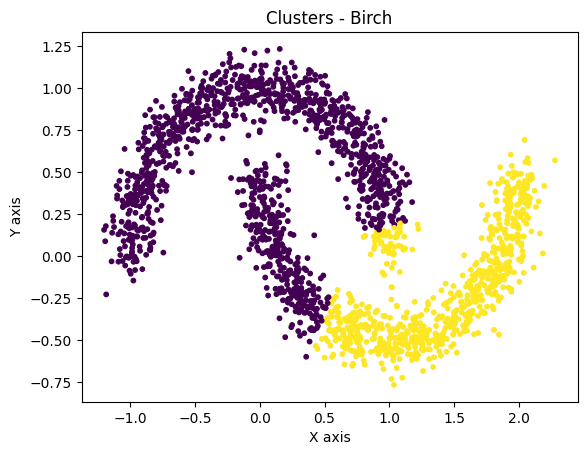

In [38]:
display_clusters(y_pred, df2_X, 'Clusters - Birch')

### DBSCAN

In [39]:
dbscan = DBSCAN(eps = 0.2, min_samples = 70)
y_pred = dbscan.fit_predict(df2_X)

In [40]:
display_clustering_evaluation_metrics(y_pred, df2_y)

Silhoutte score: 0.9900130170250409
ARI score: 0.9920149895714532
NMI score: 0.9787649300611727


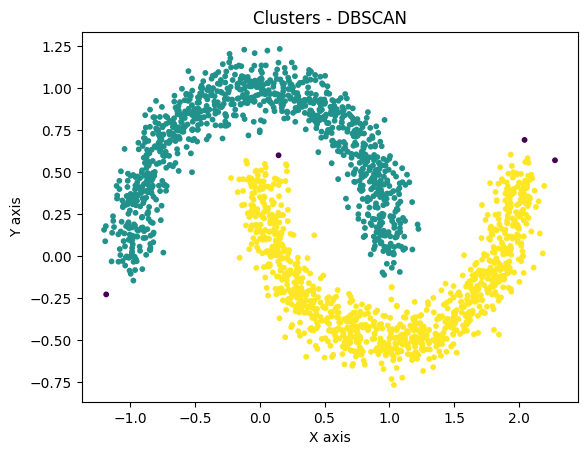

In [41]:
display_clusters(y_pred, df2_X, 'Clusters - DBSCAN')

### Comparison: Agnes VS Birch VS DBSCAN

DBSCAN-модель продемонструвала найкращі (серед трьох створених моделей) результати кластеризації за всіма обраними метриками оцінки (Silhoutte, ARI та NMI).

## 4. Affinity Propagation + K-Means

### Affinity Propagation

In [42]:
ap = AffinityPropagation(damping = 0.9, max_iter = 1000)
y_pred = ap.fit_predict(df2_X)

In [43]:
display_clustering_evaluation_metrics(y_pred, df2_y)

Silhoutte score: -0.046
ARI score: 0.09133595677007185
NMI score: 0.3646515168795521


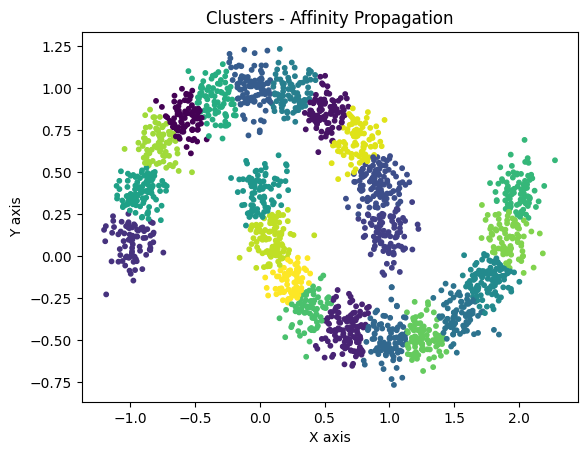

In [44]:
display_clusters(y_pred, df2_X, 'Clusters - Affinity Propagation')

### K-Means

In [45]:
kmeans = KMeans(n_clusters = 2, n_init = 10)
y_pred = kmeans.fit_predict(df2_X)

In [46]:
display_clustering_evaluation_metrics(y_pred, df2_y)

Silhoutte score: 0.33077871543457515
ARI score: 0.24762763165062956
NMI score: 0.18714564323074934


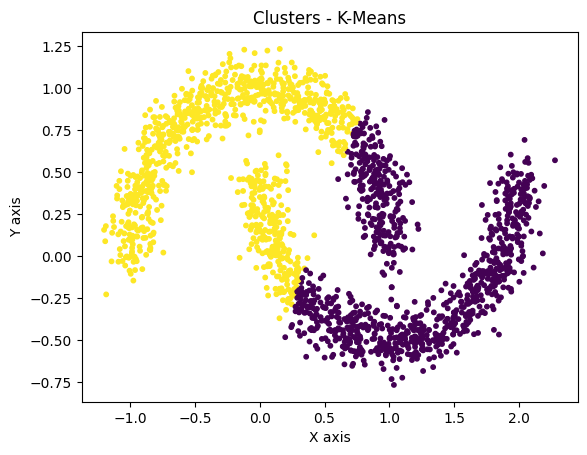

In [47]:
display_clusters(y_pred, df2_X, 'Clusters - K-Means')

### Comparison: Affinity Propagation VS K-Means

KMeans-модель продемонструвала кращі результати кластеризації за всіма обраними метриками оцінки (Silhoutte, ARI та NMI).